In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
from matplotlib.animation import FuncAnimation, PillowWriter
from mpl_toolkits import mplot3d
from matplotlib import rcParams
import copy
import math

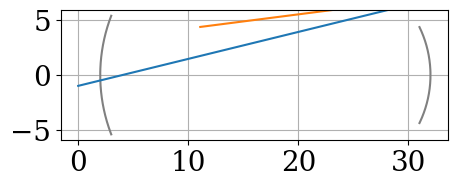

In [18]:
# Define the font family and size
font = {'family' : 'serif', 'size' : 20 }
mpl.rc('font', **font)
mpl.rcParams['mathtext.fontset'] = 'cm' # Set the math font to Computer Modern
mpl.rcParams['legend.fontsize'] = 1
fig, ax = plt.subplots(figsize=(5,5))
ax.grid()
ax.set_aspect('equal')

# lens
lens_1_r = 15
lens_1_r_x = lens_1_r
lens_1_r_y = lens_1_r
lens_1_x_l = lens_1_r+2
lens_1_x_min = lens_1_x_l - lens_1_r_x
lens_1_x_max = lens_1_x_l - lens_1_r_x + 1
lens_1_nPoints = 500

lens_2_r = 10
lens_2_r_x = lens_2_r
lens_2_r_y = lens_2_r
lens_2_x_l = lens_2_r+2+10
lens_2_x_min = lens_2_r + lens_2_x_l - 1
lens_2_x_max = lens_2_r + lens_2_x_l
lens_2_nPoints = 500

n_i = 1
n_l = 2
n_t = 1

# ray
theta_i = 0
x_i = 0
y_i = 0 
x_lim_min = 0
x_lim_max = 0
y_lim_min = -1
y_lim_max = 1
theta_lim_min = -math.pi/10
theta_lim_max =  math.pi/10
x_inc = 4
y_inc = 0

# plot
nFrames = 100

# define lens
lens_x = []
lens_y = []
for lens_x_cur in np.linspace(lens_1_x_max, lens_1_x_min, lens_1_nPoints):
  lens_x.append( lens_x_cur )
  val = (lens_1_r_y**2 - lens_1_r_x**2/lens_1_r_y**2*(lens_x_cur-lens_1_x_l)**2)**(1/2)
  lens_y.append(val)
for lens_x_cur in np.linspace(lens_1_x_min, lens_1_x_max, lens_1_nPoints):
  lens_x.append( lens_x_cur )
  val = (lens_1_r_y**2 - lens_1_r_x**2/lens_1_r_y**2*(lens_x_cur-lens_1_x_l)**2)**(1/2)
  lens_y.append(-val)
lens_1 = ax.plot(lens_x, lens_y,color='gray')[0]

lens_x = []
lens_y = []
for lens_x_cur in np.linspace(lens_2_x_min, lens_2_x_max, lens_2_nPoints):
  lens_x.append( lens_x_cur )
  val = (lens_2_r_y**2 - lens_2_r_x**2/lens_2_r_y**2*(lens_x_cur-lens_2_x_l)**2)**(1/2)
  lens_y.append(val)
for lens_x_cur in np.linspace(lens_2_x_max, lens_2_x_min, lens_2_nPoints):
  lens_x.append( lens_x_cur )
  val = (lens_2_r_y**2 - lens_2_r_x**2/lens_2_r_y**2*(lens_x_cur-lens_2_x_l)**2)**(1/2)
  lens_y.append(-val)
lens_2 = ax.plot(lens_x, lens_y,color='gray')[0]

# define ray
def get_ray(x_i, y_i, theta_i, x_l, r, x_max, side):
  m = math.tan(theta_i)
  c_1 = 1 - m**2
  c_2 = m*(-2*y_i + 2*x_i*m) - 2*x_l
  c_3 = x_i*m*(2*y_i - x_i*m) + x_l**2 - y_i**2 - r**2
  if c_2**2-4*c_1*c_3 < 0:
    x_incident = x_max
  elif side == 'l':
    x_incident = (-c_2 - (c_2**2 - 4*c_1*c_3)**(1/2))/(2*c_1)
  elif side == 'r':
    x_incident = (-c_2 + (c_2**2 - 4*c_1*c_3)**(1/2))/(2*c_1)
  else:
    print('side should be either \'l\' or \'r\'')
  y_incident = m*(x_incident - x_i) + y_i
  # print("Incidence: ("+str(x_incident)+","+str(y_incident)+")")
  ray_x = [x_i, x_incident]
  ray_y = [y_i, y_incident]
  return ray_x, ray_y
ray_x, ray_y = get_ray(x_i, y_i, theta_i, lens_1_x_l, lens_1_r, lens_1_x_max, 'l')
ray_i = ax.plot(ray_x, ray_y)[0]

def get_Deltatheta(x_i, y_i, theta_i, n_i, n_t, x_l):
  return math.sin(n_i/n_t*math.sin(theta_i+math.atan(y_i/(x_i-x_l))))-math.atan(y_i/(x_i-x_l))
Deltatheta = get_Deltatheta(ray_x[1], ray_y[1], theta_i, n_i, n_l, lens_1_x_l)
ray_x, ray_y = get_ray(ray_x[1], ray_y[1], theta_i+Deltatheta, lens_1_x_l, lens_1_r, lens_1_x_max, 'l')
ray_l = ax.plot(ray_x, ray_y)[0]

def update(nFrame):
  x_i = 0
  y_i = y_lim_max - nFrame*(y_lim_max - y_lim_min)/nFrames
  theta_i = math.atan((y_inc - y_i)/(x_inc - x_i))

  ray_x, ray_y = get_ray(x_i, y_i, theta_i, lens_1_x_l, lens_1_r, lens_1_x_max, 'l')
  ray_i.set_data(ray_x, ray_y)

  Deltatheta = get_Deltatheta(ray_x[1], ray_y[1], theta_i, n_i, n_l, lens_1_x_l)
  ray_x, ray_y = get_ray(ray_x[1], ray_y[1], theta_i+Deltatheta, lens_2_x_l, lens_2_r, lens_2_x_max, 'r')
  ray_l.set_data(ray_x, ray_y)
  return lens_1, lens_2, ray_i, ray_l

# Create the animation
animation = FuncAnimation(fig, update, frames=nFrames, interval=50, blit=True)

# Save the animation as a GIF
animation.save('shperical_TRT.gif', writer='pillow')

# Show the plot (optional)
plt.show()